## Visualizing Single-layer Neural Network Decision Boundaries
In this notebook the simple R [neuralnet](https://cran.r-project.org/web/packages/neuralnet/neuralnet.pdf) package's single-layer neural network is provided varying numbers of nodes to demonstrate the difference in learned decision boundaries.

Import Libraries, Data, Define Intercept Function

In [1]:
library(neuralnet)
train <- read.table("data/nine_instances.txt", header=T, sep=",")

# Defining function for calculating equation of line
findinterceptslope<-function(w)
{
slope<-w[2]/w[3]*(-1)
intercept<-w[1]/w[3]*(-1)
rvector<-c(intercept,slope)
return(rvector)
}

Warning message:
"package 'neuralnet' was built under R version 3.6.3"


Create 2-Node Model

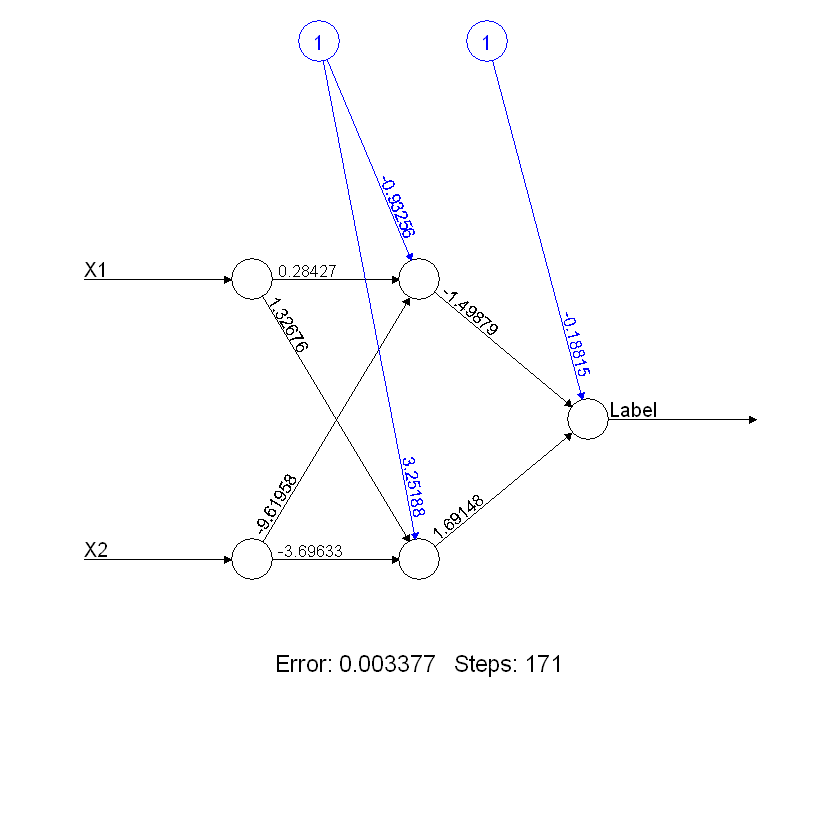

In [2]:
repititions <- 5
net<-neuralnet(Label~X1+X2,train,hidden=2,rep=repititions)
#options(repr.plot.width = 20, repr.plot.height = 12, repr.plot.res = 300)
plot(net,rep="best")

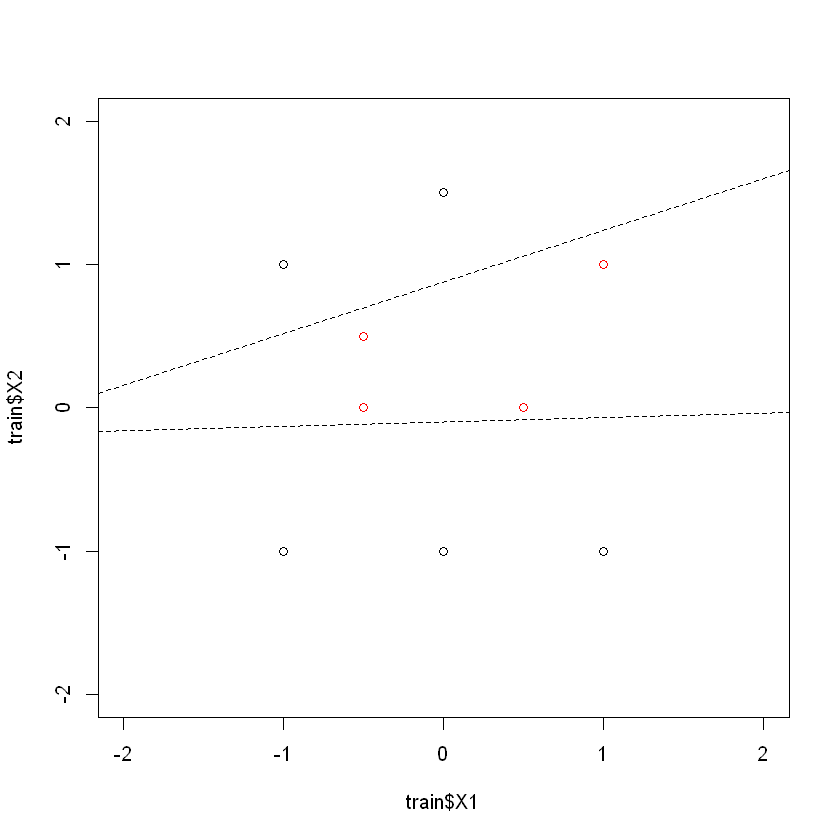

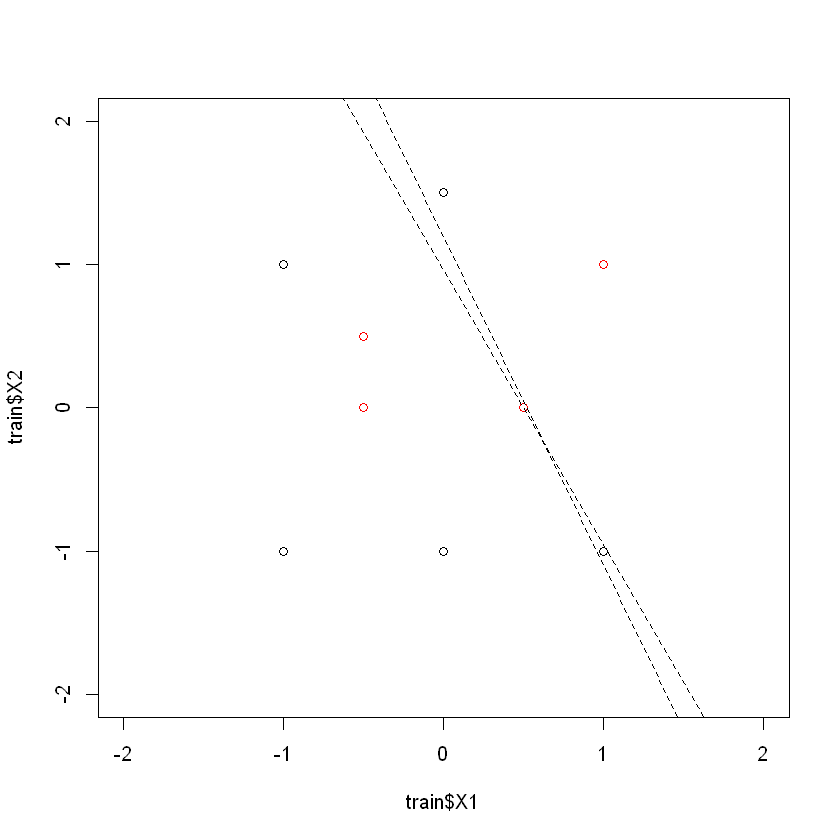

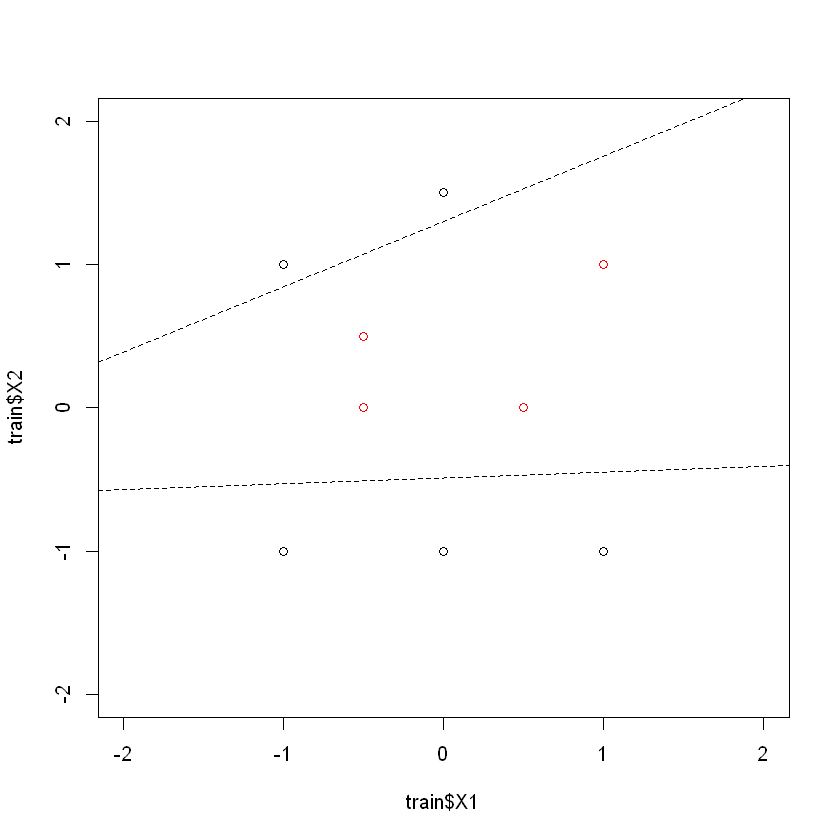

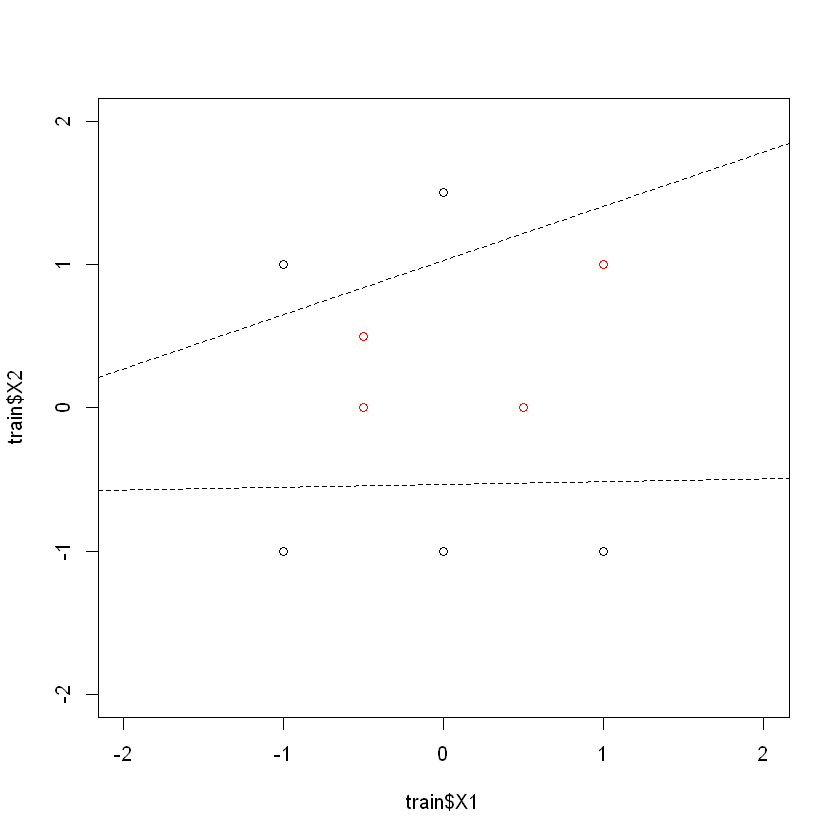

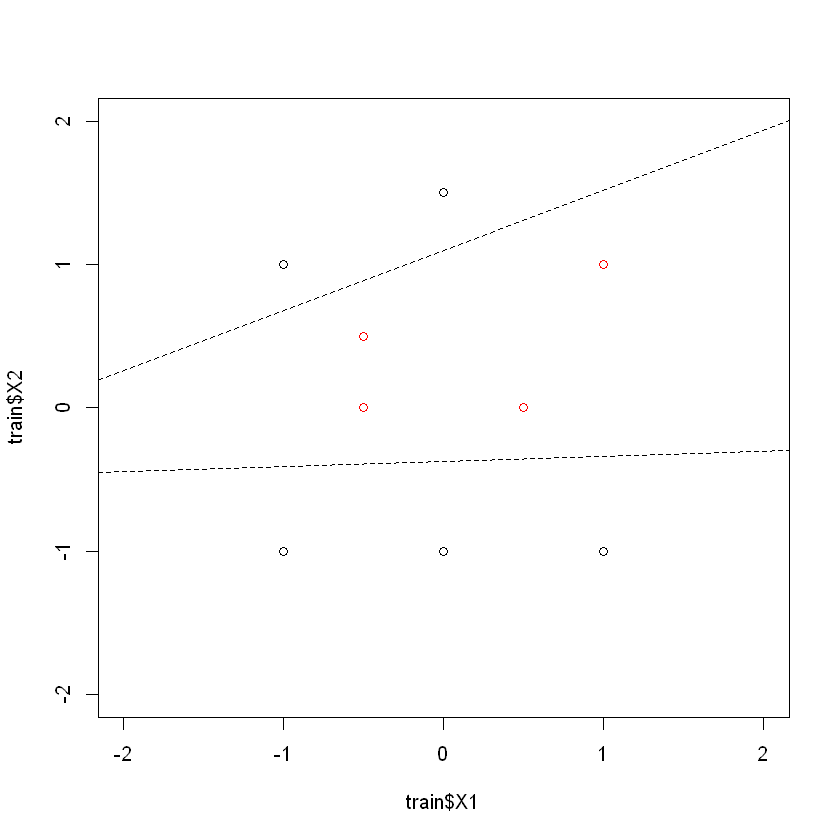

In [3]:
# Graphing Decision Boundary
# For every repitition
for(i in 1:repititions){
    
    # Create new plot
    plot(train$X1,train$X2,col=c("black","red")[train$Label+1],xlim=c(-2,2),ylim=c(-2,2))
    
    # Calculate and draw line for every node
    for(j in 1:dim(net$weights[[1]][[1]])[2]){
        line <- findinterceptslope(net$weights[[i]][[1]][,j])
        abline(line[1], line[2], lty=2)
    }    
}

Create 3-Node Model

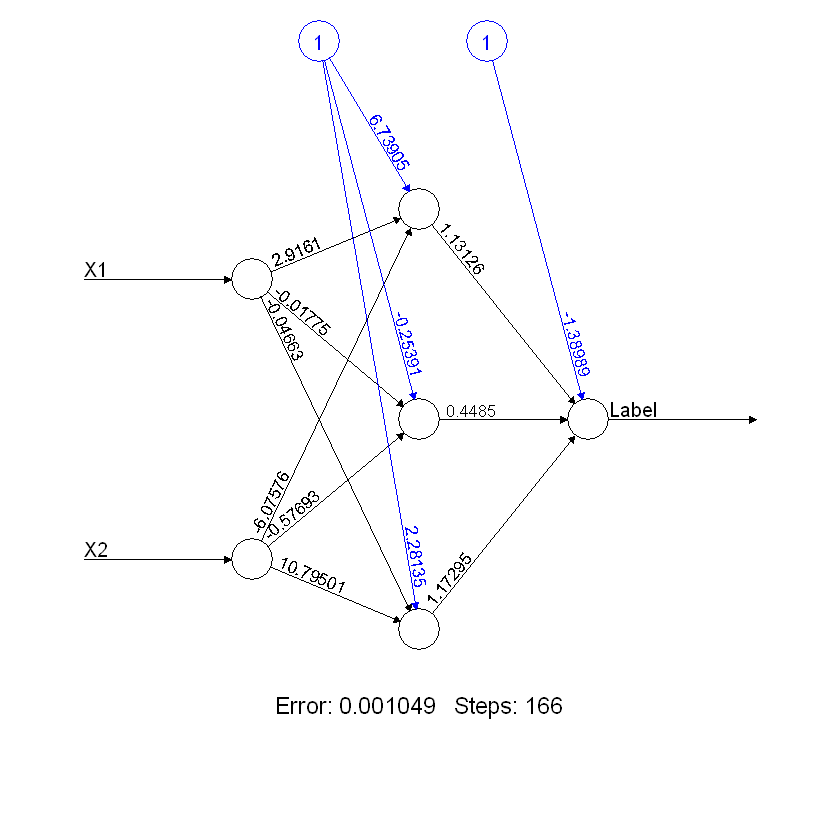

In [4]:
net<-neuralnet(Label~X1+X2,train,hidden=3,rep=repititions)
plot(net,rep=1)

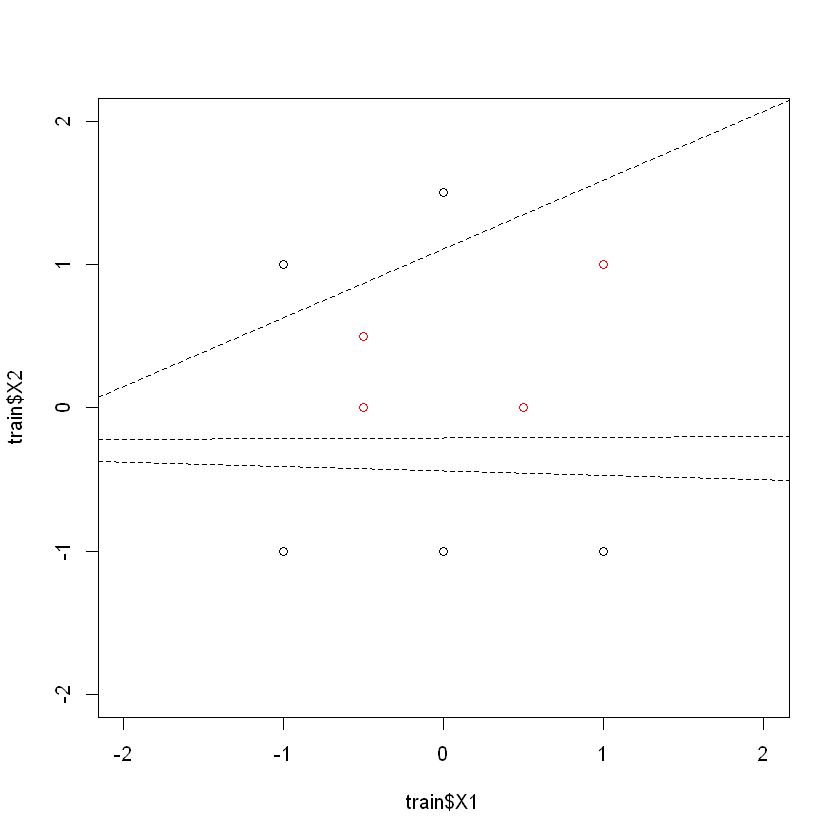

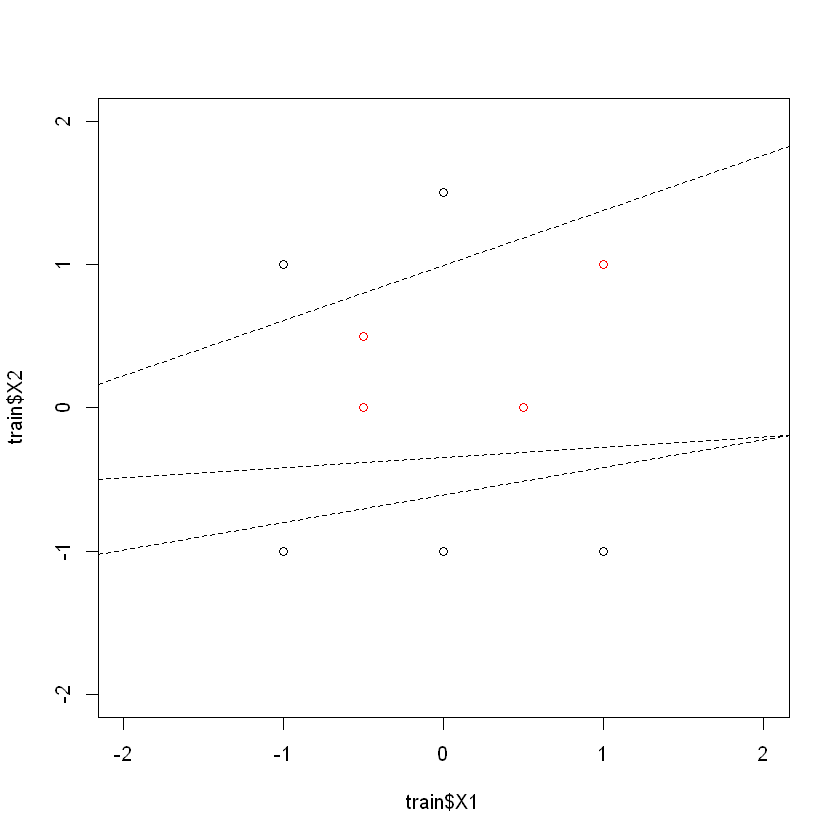

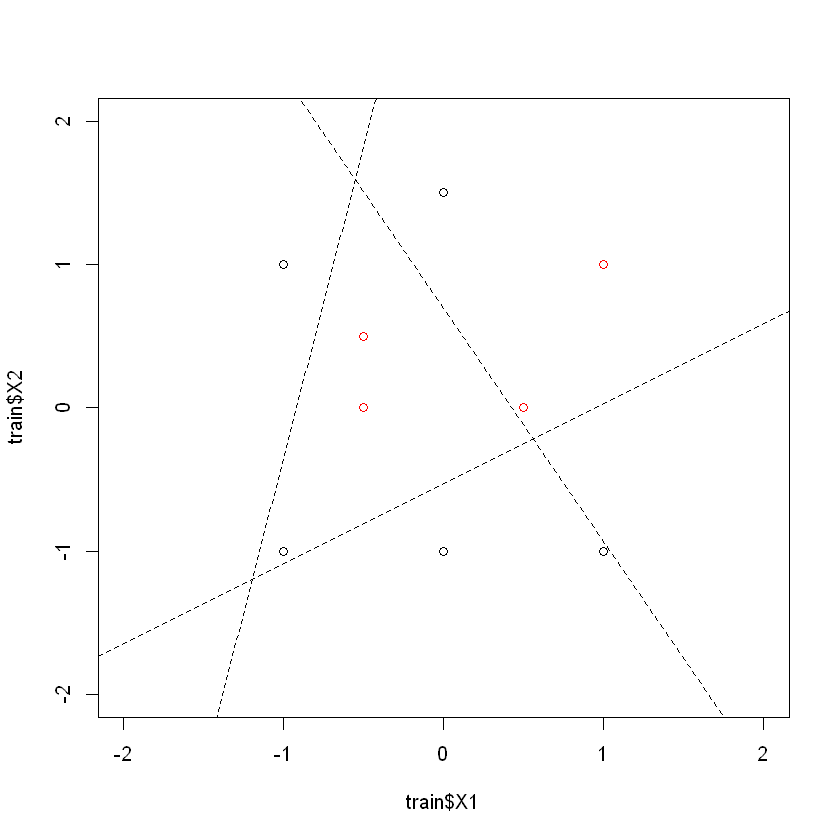

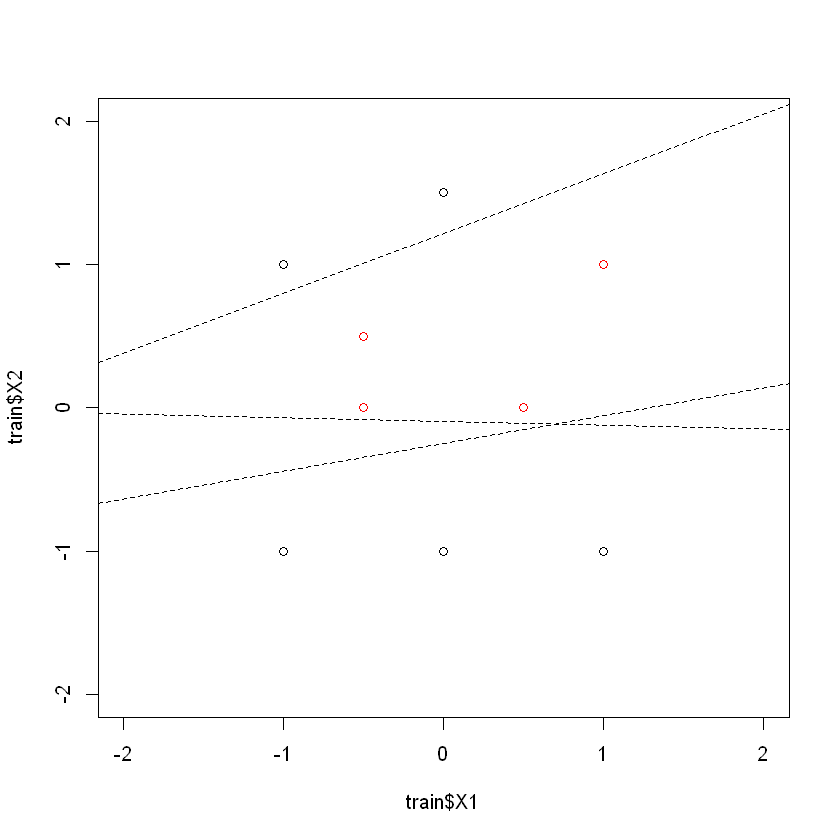

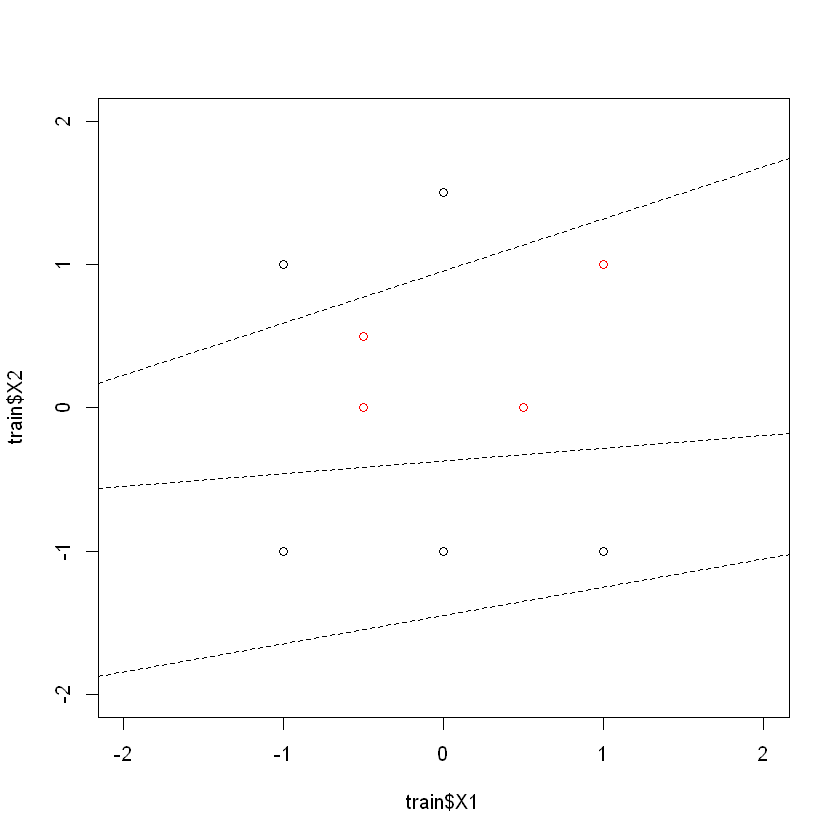

In [5]:
# Graphing Decision Boundary
# For every repitition
for(i in 1:repititions){
    
    # Create new plot
    plot(train$X1,train$X2,col=c("black","red")[train$Label+1],xlim=c(-2,2),ylim=c(-2,2))
    
    # Calculate and draw line for every node
    for(j in 1:dim(net$weights[[1]][[1]])[2]){
        line <- findinterceptslope(net$weights[[i]][[1]][,j])
        abline(line[1], line[2], lty=2)
    }    
}

Each node within these networks recieves three values, X0, X1 and X2. The network changes the weight values corresponding to these three inputs to create decision boundaries between classes. Each node with its three parameters (weights) can translate and rotate freely to create any straight line. Thus the two-node network only considers two lines while the three-node network considers three lines.

By examining the data it is clear that the clustering of the different classes requires a decision boundary more complex than provided by a two-node single-layer neural network. The decision boundary created by two lines cannot seperate the two classes in feature space without error, while the three-node network can produce a decision boundary with no errors in feature space from the given data.